In [21]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import pandas as pd
import numpy as np
import re
# Import standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Import train_test_split and preprocessing libraries / classes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Import ML models for regression problems
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# Import ML models for classification problems
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Import model performace metric libraries
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, precision_score, recall_score

# Import for optimization
from sklearn.model_selection import GridSearchCV

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [22]:
# Load your dataset
df = pd.read_csv('/Users/marina/Desktop/final_project/data/cleaned/okcupid_scaledfinal.csv')


In [23]:
for col in df.columns:
    print(f"Column: {col}, dtype: {df.dtypes[col]}")

Column: profile_id, dtype: int64
Column: age, dtype: float64
Column: height, dtype: float64
Column: income, dtype: float64
Column: speaks, dtype: float64
Column: love, dtype: int64
Column: fun, dtype: int64
Column: cooking, dtype: int64
Column: music, dtype: int64
Column: read, dtype: int64
Column: friends, dtype: int64
Column: work, dtype: int64
Column: travel, dtype: int64
Column: humor, dtype: int64
Column: movie, dtype: int64
Column: laugh, dtype: int64
Column: new, dtype: int64
Column: personality, dtype: int64
Column: future, dtype: int64
Column: people, dtype: int64
Column: smile, dtype: int64
Column: talk, dtype: int64
Column: life, dtype: int64
Column: tv, dtype: int64
Column: play, dtype: int64
Column: status_seeing someone, dtype: float64
Column: status_single, dtype: float64
Column: sex_m, dtype: float64
Column: orientation_gay, dtype: float64
Column: orientation_straight, dtype: float64
Column: body_type_curvy, dtype: float64
Column: body_type_fit, dtype: float64
Column: b

In [28]:

from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(['profile_id'], axis=1)  # Assuming 'profile_id' is not used in training
y = df['profile_id']  # Profile IDs will be used to identify similar profiles

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=20)

# Fit the k-NN model on the training data
knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=20)

In [39]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the k-NN classifier on scaled data
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_scaled, y_train)

# Predict on the scaled test set
y_pred = knn.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)  # Use zero_division=1 to handle zero precision
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)  # Use zero_division=1 to handle zero recall
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)  # Use zero_division=1 to handle zero F1-score

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Accuracy: 0.0
Precision: 1.0
Recall: 0.0
F1-score: 0.0


In [34]:
X = df.drop(['profile_id'], axis=1).values  # Use .values to get numpy array without 'profile_id' column

# Initialize NearestNeighbors model
nn = NearestNeighbors(n_neighbors=20, algorithm='auto')

# Fit the model
nn.fit(X)

# Example profile ID for which to find similar profiles
example_profile_id = 1234  # Replace with an actual profile ID

# Find indices and distances of the 20 most similar profiles
# Assuming you have a function to get the features of a specific profile ID
def get_features(profile_id):
    # Example function to retrieve features for a given profile ID
    return df[df['profile_id'] == profile_id].drop(['profile_id'], axis=1).values

# Get features of the example profile
example_features = get_features(example_profile_id)

# Find nearest neighbors to the example profile
distances, indices = nn.kneighbors(example_features)

# Print the indices and distances of the nearest neighbors
print(f"Indices of nearest neighbors: {indices.flatten()}")
print(f"Distances to nearest neighbors: {distances.flatten()}")

Indices of nearest neighbors: [  234  3348 19216 44206   910  7956 35623 42921 44455 46173 10208 25766
 45046 32465 39017 36165 36048 26573 35831 44308]
Distances to nearest neighbors: [0.         2.4642013  3.04700682 3.06416929 3.06488972 3.08114469
 3.19880406 3.2066436  3.2522097  3.25291412 3.26910805 3.27375565
 3.27470894 3.28114055 3.33222231 3.3360819  3.35217571 3.35532658
 3.35620889 3.35897069]


In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Example: Assuming df is your dataframe containing the dataset
# and 'profile_id' is not included in X

# Define features (X) and target (y)
feature_names = df.drop(['profile_id'], axis=1).columns.tolist()
X = df.drop(['profile_id'], axis=1).values
y = df['profile_id'].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=20)

# Fit the k-NN model on the training data
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")



Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/Users/marina/Desktop/final_project/venvfinal/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/marina/Desktop/final_project/venvfinal/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import average_precision_score
import numpy as np

# Assuming df is your dataframe containing the dataset
# and 'profile_id' is not included in X

# Define features (X)
X = df.drop(['profile_id'], axis=1).values  # Use .values to get numpy array without 'profile_id' column
profile_ids = df['profile_id'].values

# Split data into training and test sets
X_train, X_test, profile_ids_train, profile_ids_test = train_test_split(X, profile_ids, test_size=0.2, random_state=42)

# Initialize NearestNeighbors model
nn = NearestNeighbors(n_neighbors=20, algorithm='auto')

# Fit the model on the training data
nn.fit(X_train)

# Function to evaluate Mean Average Precision (MAP)
def evaluate_map(model, X_test, profile_ids_test, k=20):
    average_precision = 0.0
    for i in range(len(X_test)):
        query_features = X_test[i].reshape(1, -1)
        true_neighbors = np.where(profile_ids_train == profile_ids_test[i])[0]
        
        distances, indices = model.kneighbors(query_features)
        retrieved_neighbors = profile_ids_train[indices.flatten()]
        
        # Calculate Average Precision for this query
        ap = average_precision_score(np.isin(retrieved_neighbors, true_neighbors), 
                                     np.arange(1, k+1), 
                                     average='micro')
        average_precision += ap
    
    return average_precision / len(X_test)

# Evaluate MAP on the test set
map_score = evaluate_map(nn, X_test, profile_ids_test)

print(f"Mean Average Precision (MAP): {map_score}")


/Users/marina/Desktop/final_project/venvfinal/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/Users/marina/Desktop/final_project/venvfinal/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/Users/marina/Desktop/final_project/venvfinal/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/Users/marina/Desktop/final_project/venvfinal/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/Users/marina/Desktop/final_project/venvfinal/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class 

KeyboardInterrupt: 

In [33]:
# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use weighted average for multiclass/multilabel targets
recall = recall_score(y_test, y_pred, average='weighted')  # Use weighted average for multiclass/multilabel targets

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.0
Precision: 0.0
Recall: 0.0


/Users/marina/Desktop/final_project/venvfinal/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/marina/Desktop/final_project/venvfinal/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


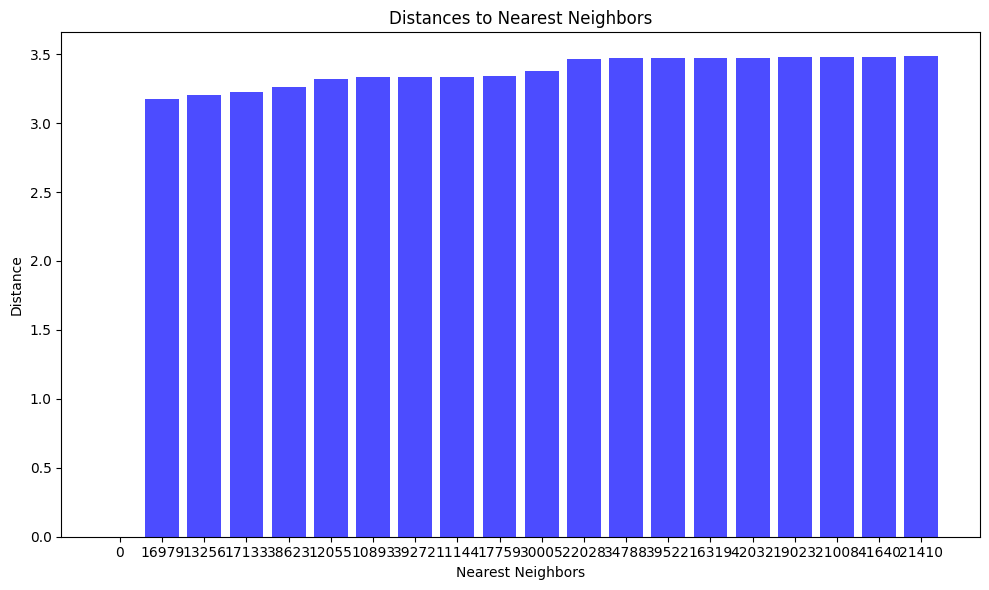

In [26]:
import matplotlib.pyplot as plt

# Plot distances to nearest neighbors
plt.figure(figsize=(10, 6))
plt.bar(range(len(distances[0])), distances[0], color='blue', alpha=0.7)
plt.xlabel('Nearest Neighbors')
plt.ylabel('Distance')
plt.title('Distances to Nearest Neighbors')
plt.xticks(range(len(distances[0])), indices[0])
plt.tight_layout()
plt.show()

In [25]:
# Example user profile input (you can replace this with actual user input)
sample_profile = X.iloc[0].values.reshape(1, -1)  # Use the first row as an example

# Find 20 nearest neighbors to the sample profile
distances, indices = knn.kneighbors(sample_profile)

# Display the indices and distances of the nearest neighbors
print("Indices of nearest neighbors:")
print(indices)

print("\nDistances to nearest neighbors:")
print(distances)

# Get the actual profile IDs of the nearest neighbors
nearest_neighbor_ids = y.iloc[indices[0]].tolist()

print("\nProfile IDs of nearest neighbors:")
print(nearest_neighbor_ids)

# Assuming df contains profile details including 'profile_id'
nearest_neighbors_details = df[df['profile_id'].isin(nearest_neighbor_ids)]

# Display details of nearest neighbors
print("\nDetails of nearest neighbors:")
print(nearest_neighbors_details)


/Users/marina/Desktop/final_project/venvfinal/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


Indices of nearest neighbors:
[[    0 16979 13256 17133 38623 12055 10893 39272 11144 17759 30005 22028
  34788 39522 16319 42032 19023 21008 41640 21410]]

Distances to nearest neighbors:
[[0.         3.17619975 3.20222195 3.2254046  3.25848836 3.3209493
  3.33194213 3.33535416 3.33738716 3.33903064 3.37756293 3.46797332
  3.4689216  3.46965239 3.47476046 3.47496122 3.4765943  3.47689467
  3.47773649 3.48382606]]

Profile IDs of nearest neighbors:
[1000, 17999, 14269, 18153, 39676, 13068, 11906, 40328, 12157, 18782, 31046, 23058, 35836, 40579, 17337, 43094, 20048, 22034, 42702, 22438]

Details of nearest neighbors:
       profile_id       age    height    income  speaks  love  fun  cooking  \
0            1000  0.078431  0.655172  0.066327    0.00     1    1        0   
10893       11906  0.176471  0.482759  0.066700    0.25     1    1        0   
11144       12157  0.352941  0.637931  0.066700    0.25     1    1        0   
12055       13068  0.176471  0.517241  0.074548    0.00     